In [1]:
# Import Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv("NY property data.csv")

In [3]:
# Exclusions: Remove recards that we aren't interested in.

In [4]:
remove_list = [
    "PARKCHESTER PRESERVAT",
    "PARKS AND RECREATION",
    "DCAS",
    "HOUSING PRESERVATION",
    "CITY OF NEW YORK",
    "DEPT OF ENVIRONMENTAL",
    "BOARD OF EDUCATION",
    "NEW YORK CITY HOUSING",
    "CNY/NYCTA",
    "NYC HOUSING PARTNERSH",
    "DEPARTMENT OF BUSINES",
    "DEPT OF TRANSPORTATIO",
    "MTA/LIRR",
    "PARCKHESTER PRESERVAT",
    "MH RESIDENTIAL 1, LLC",
    "LINCOLN PLAZA ASSOCIA",
    "UNITED STATES OF AMER",
    "U S GOVERNMENT OWNRD",
    "THE CITY OF NEW YORK",
    "NYS URBAN DEVELOPMENT",
    "NYS DEPT OF ENVIRONME",
    "CULTURAL AFFAIRS",
    "DEPT OF GENERAL SERVI",
    "DEPT RE-CITY OF NY",
]
property_data = data[~data["OWNER"].isin(remove_list)].reset_index(drop=True)
NY_data_orig = property_data.copy()

In [5]:
# Filling in missing ZIP
missing_zips = np.where(pd.isnull(property_data["ZIP"]))[0]
len(missing_zips)

21772

In [6]:
for i in range(len(missing_zips)):
    if (
        property_data.loc[missing_zips[i] + 1, "ZIP"]
        == property_data.loc[missing_zips[i] - 1, "ZIP"]
    ):
        property_data.loc[missing_zips[i], "ZIP"] = property_data.loc[
            missing_zips[i] - 1, "ZIP"
        ]

In [7]:
missing_zips = np.where(pd.isnull(property_data["ZIP"]))[0]
len(missing_zips)

10245

In [8]:
for i in range(len(missing_zips)):
    property_data.loc[missing_zips[i], "ZIP"] = property_data.loc[
        missing_zips[i] - 1, "ZIP"
    ]

In [9]:
missing_zips = np.where(pd.isnull(property_data["ZIP"]))[0]
len(missing_zips)

0

In [10]:
# Filling in Missing FULLVAL, AVLAND, AVTOT
property_data["FULLVAL"].replace("NaN", 0)
temp = property_data[property_data["FULLVAL"] != 0]
mean_fullval = temp.groupby("TAXCLASS")["FULLVAL"].mean()
print(mean_fullval)

TAXCLASS
1     5.700059e+05
1A    3.352942e+05
1B    3.738399e+05
1C    7.615359e+05
1D    2.233614e+07
2     8.005832e+05
2A    8.639066e+05
2B    1.254525e+06
2C    7.723493e+05
3     8.510005e+04
4     2.772747e+06
Name: FULLVAL, dtype: float64


In [11]:
property_data["AVLAND"].replace("NaN", 0)
temp_avland = property_data[property_data["AVLAND"] != 0]
mean_avland = temp_avland.groupby("TAXCLASS")["AVLAND"].mean()

In [12]:
property_data["AVTOT"].replace("NaN", 0)
temp_avtot = property_data[property_data["AVTOT"] != 0]
mean_avtot = temp_avtot.groupby("TAXCLASS")["AVTOT"].mean()

In [13]:
# Substituting decent values for AVTOT, AVLAND, FULLVAL from averages by taxclass.
for index in mean_fullval.index:
    property_data.loc[
        (property_data["FULLVAL"] == 0) & (property_data["TAXCLASS"] == index),
        "FULLVAL",
    ] = mean_fullval[index]
    property_data.loc[
        (property_data["AVLAND"] == 0) & (property_data["TAXCLASS"] == index), "AVLAND"
    ] = mean_avland[index]
    property_data.loc[
        (property_data["AVTOT"] == 0) & (property_data["TAXCLASS"] == index), "AVTOT"
    ] = mean_avtot[index]

In [14]:
# Filling in missing STORIES
temp = property_data[property_data["STORIES"].isnull()]
len(temp)

43968

In [15]:
temp["TAXCLASS"].value_counts()

1B    19055
4     17979
2      3434
3      2416
1       877
2C      138
2B       34
2A       30
1A        5
Name: TAXCLASS, dtype: int64

In [16]:
mean_stories = property_data.groupby("TAXCLASS")["STORIES"].mean()
print(mean_stories)

TAXCLASS
1      2.111633
1A     1.656867
1B     4.000000
1C     3.052748
1D     1.068966
2     16.310549
2A     2.844032
2B     4.001635
2C     4.744977
3      1.000000
4      5.517257
Name: STORIES, dtype: float64


In [17]:
len(property_data[property_data["STORIES"] == 0])

0

In [18]:
property_data["STORIES"] = property_data["STORIES"].fillna(value=0)
for index in mean_stories.index:
    property_data.loc[
        (property_data["STORIES"] == 0) & (property_data["TAXCLASS"] == index),
        "STORIES",
    ] = mean_stories[index]

In [19]:
property_data.head().transpose()

,0,1,2,3,4
RECORD,1,2,9,10,11
BBLE,1000010101,1000010201,1000041001,1000041002,1000041003
B,1,1,1,1,1
BLOCK,1,1,4,4,4
LOT,101,201,1001,1002,1003
EASEMENT,NaN,NaN,NaN,NaN,NaN
OWNER,U S GOVT LAND & BLDGS,U S GOVT LAND & BLDGS,"TRZ HOLDINGS, LLC","TRZ HOLDINGS, LLC","TRZ HOLDINGS, LLC"
BLDGCL,P7,Z9,R5,R5,R5
TAXCLASS,4,4,4,4,4
LTFRONT,500,27,0,0,0


In [20]:
# Filling in Missing Lot and Building sizes
# as these 4 values do not have NAs, we need to replace 0s.
# calculate groupwise average. First replace the 0’s and 1’s by NAs so they are not counted in calculating mean.
property_data.loc[property_data["LTFRONT"] == 0, "LTFRONT"] = np.nan
property_data.loc[property_data["LTDEPTH"] == 0, "LTDEPTH"] = np.nan
property_data.loc[property_data["BLDFRONT"] == 0, "BLDFRONT"] = np.nan
property_data.loc[property_data["BLDDEPTH"] == 0, "BLDDEPTH"] = np.nan
property_data.loc[property_data["LTFRONT"] == 1, "LTFRONT"] = np.nan
property_data.loc[property_data["LTDEPTH"] == 1, "LTDEPTH"] = np.nan
property_data.loc[property_data["BLDFRONT"] == 1, "BLDFRONT"] = np.nan
property_data.loc[property_data["BLDDEPTH"] == 1, "BLDDEPTH"] = np.nan

# calculate the mean now (mean function ignores NAs but not 0s hence we converted 0 to NA)
mean_LTFRONT = property_data.groupby(property_data["TAXCLASS"])["LTFRONT"].mean()
mean_LTDEPTH = property_data.groupby(property_data["TAXCLASS"])["LTDEPTH"].mean()
mean_BLDFRONT = property_data.groupby(property_data["TAXCLASS"])["BLDFRONT"].mean()
mean_BLDDEPTH = property_data.groupby(property_data["TAXCLASS"])["BLDDEPTH"].mean()

# impute values
for index in mean_LTFRONT.index:
    property_data.loc[
        (property_data["LTFRONT"].isnull()) & (property_data["TAXCLASS"] == index),
        "LTFRONT",
    ] = mean_LTFRONT[index]
    property_data.loc[
        (property_data["LTDEPTH"].isnull()) & (property_data["TAXCLASS"] == index),
        "LTDEPTH",
    ] = mean_LTDEPTH[index]
    property_data.loc[
        (property_data["BLDFRONT"].isnull()) & (property_data["TAXCLASS"] == index),
        "BLDFRONT",
    ] = mean_BLDFRONT[index]
    property_data.loc[
        (property_data["BLDDEPTH"].isnull()) & (property_data["TAXCLASS"] == index),
        "BLDDEPTH",
    ] = mean_BLDDEPTH[index]

In [21]:
# convert ZIP to an integer rather than a float
property_data["ZIP"] = property_data["ZIP"].astype(str)
property_data["zip3"] = property_data["ZIP"].str[:3]

In [22]:
property_data["ltsize"] = property_data["LTFRONT"] * property_data["LTDEPTH"]
property_data["bldsize"] = property_data["BLDFRONT"] * property_data["BLDDEPTH"]
property_data["bldvol"] = property_data["bldsize"] * property_data["STORIES"]

In [23]:
property_data["r1"] = property_data["FULLVAL"] / property_data["ltsize"]
property_data["r2"] = property_data["FULLVAL"] / property_data["bldsize"]
property_data["r3"] = property_data["FULLVAL"] / property_data["bldvol"]
property_data["r4"] = property_data["AVLAND"] / property_data["ltsize"]
property_data["r5"] = property_data["AVLAND"] / property_data["bldsize"]
property_data["r6"] = property_data["AVLAND"] / property_data["bldvol"]
property_data["r7"] = property_data["AVTOT"] / property_data["ltsize"]
property_data["r8"] = property_data["AVTOT"] / property_data["bldsize"]
property_data["r9"] = property_data["AVTOT"] / property_data["bldvol"]

In [24]:
ninevars = ["r1", "r2", "r3", "r4", "r5", "r6", "r7", "r8", "r9"]
zip5_mean = property_data.groupby("ZIP")[ninevars].mean()
zip3_mean = property_data.groupby("zip3")[ninevars].mean()
taxclass_mean = property_data.groupby("TAXCLASS")[ninevars].mean()
borough_mean = property_data.groupby("B")[ninevars].mean()
property_data = property_data.join(zip5_mean, on="ZIP", rsuffix="_zip5")
property_data = property_data.join(zip3_mean, on="zip3", rsuffix="_zip3")
property_data = property_data.join(taxclass_mean, on="TAXCLASS", rsuffix="_taxclass")
property_data = property_data.join(borough_mean, on="B", rsuffix="_boro")
rsuffix = ["_zip5", "_zip3", "_taxclass", "_boro"]
for var in ninevars:
    for r in rsuffix:
        property_data[str(var) + r] = property_data[var] / property_data[str(var) + r]

In [25]:
variables = property_data[
    [
        "r1",
        "r2",
        "r3",
        "r4",
        "r5",
        "r6",
        "r7",
        "r8",
        "r9",
        "r1_zip5",
        "r2_zip5",
        "r3_zip5",
        "r4_zip5",
        "r5_zip5",
        "r6_zip5",
        "r7_zip5",
        "r8_zip5",
        "r9_zip5",
        "r1_zip3",
        "r2_zip3",
        "r3_zip3",
        "r4_zip3",
        "r5_zip3",
        "r6_zip3",
        "r7_zip3",
        "r8_zip3",
        "r9_zip3",
        "r1_taxclass",
        "r2_taxclass",
        "r3_taxclass",
        "r4_taxclass",
        "r5_taxclass",
        "r6_taxclass",
        "r7_taxclass",
        "r8_taxclass",
        "r9_taxclass",
        "r1_boro",
        "r2_boro",
        "r3_boro",
        "r4_boro",
        "r5_boro",
        "r6_boro",
        "r7_boro",
        "r8_boro",
        "r9_boro",
    ]
]

stats = variables.describe().transpose()
stats.to_csv("stats_on_vars.csv")

In [26]:
# CONTINUE WORKING ON HOMEWORK 3
# Prepare Variables for the models

In [27]:
# Scale the variables before PCA
data = property_data
save_record = data["RECORD"]
data = property_data.iloc[:, 36:]
data.head()

,r1,r2,r3,r4,r5,r6,r7,r8,r9,r1_zip5,...,r9_taxclass,r1_boro,r2_boro,r3_boro,r4_boro,r5_boro,r6_boro,r7_boro,r8_boro,r9_boro
0,40.917782,3994.412456,723.985188,8.079350,788.709805,142.953243,18.413002,1797.485605,325.793334,0.096029,...,4.715588,0.113902,7.712077,6.469193,0.241395,16.606462,13.685555,0.198288,14.042014,14.957255
1,57678.882190,36173.697854,6556.463990,4258.951518,2671.030012,484.122805,25955.496986,16278.164034,2950.408795,135.364878,...,42.704717,160.560217,69.841147,58.585497,127.249178,56.239136,46.347248,279.513149,127.165526,135.454020
2,385.182796,736.308714,14.726174,62.110738,118.729804,2.374596,173.332268,331.338940,6.626779,0.903974,...,0.095917,1.072230,1.421603,0.131586,1.855748,2.499883,0.227331,1.866605,2.588430,0.304237
3,556.662267,1064.105879,21.282118,89.761892,171.587267,3.431745,250.498069,478.847739,9.576955,1.306414,...,0.138618,1.549576,2.054487,0.190167,2.681911,3.612808,0.328536,2.697598,3.740773,0.439680
4,1035.027624,1978.540749,39.570815,94.470682,180.588507,3.611770,465.762431,890.343337,17.806867,2.429076,...,0.257740,2.881198,3.820001,0.353586,2.822600,3.802332,0.345771,5.015767,6.955390,0.817518


In [28]:
# data.drop(columns='RECORD', inplace=True)
data = (data - data.mean()) / data.std()
data.head()

,r1,r2,r3,r4,r5,r6,r7,r8,r9,r1_zip5,...,r9_taxclass,r1_boro,r2_boro,r3_boro,r4_boro,r5_boro,r6_boro,r7_boro,r8_boro,r9_boro
0,-0.324189,3.365634,0.962071,-0.034088,2.023461,0.745320,-0.041301,1.874086,0.937911,-0.417857,...,0.660210,-0.374523,3.352458,2.151291,-0.120245,0.910164,0.790755,-0.110174,0.594662,0.887478
1,107.903135,34.685411,12.654552,60.713604,6.996480,2.658471,127.179921,17.407961,8.963675,62.109671,...,7.410371,67.440601,34.383853,22.651090,20.011593,3.221530,2.826725,38.274168,5.752631,8.549314
2,0.322241,0.194554,-0.459794,0.738056,0.253399,-0.042992,0.718576,0.301305,-0.038062,-0.044388,...,-0.160643,0.030529,0.210577,-0.341588,0.135643,0.087473,-0.048164,0.119092,0.072426,-0.044240
3,0.644229,0.513596,-0.446651,1.133208,0.393046,-0.037064,1.097074,0.459542,-0.029041,0.141639,...,-0.153056,0.232287,0.526681,-0.318545,0.266597,0.152378,-0.041856,0.233289,0.124968,-0.035628
4,1.542460,1.403606,-0.409988,1.200500,0.416827,-0.036055,2.152944,0.900967,-0.003875,0.660585,...,-0.131890,0.795117,1.408496,-0.254265,0.288898,0.163431,-0.040781,0.551860,0.271541,-0.011603


(0.0, 1.0)

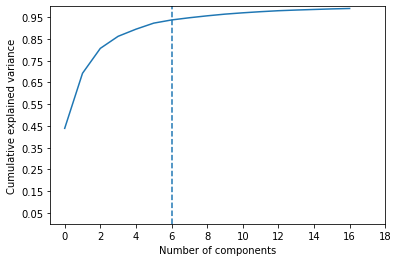

In [30]:
# Compute most of the PC components and looks at the scree plot.
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99, svd_solver="full")
pca.fit(data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.yticks(np.arange(0.05, 1.1, step=0.1))
plt.xticks(np.arange(0, 20, step=2))
plt.axvline(x=6, linestyle="--")
plt.ylim(0, 1)

In [31]:
# Decide to just keep the top 6 PCs. Recompute them.
pca = PCA(n_components=6)
princ_comps = pca.fit_transform(data)
data_pca = pd.DataFrame(
    princ_comps, columns=["PC" + str(i) for i in range(1, pca.n_components_ + 1)]
)
data_pca.shape

(1046826, 6)

In [32]:
# Z scale the PC's
pca_mean = data_pca.mean()
pca_sd = data_pca.std()
data_pca = (data_pca - pca_mean) / pca_sd
data_pca.describe()
# Now the data is ready for the fraud algorithms.

,PC1,PC2,PC3,PC4,PC5,PC6
count,1.046826e+06,1.046826e+06,1.046826e+06,1.046826e+06,1.046826e+06,1.046826e+06
mean,6.631477e-17,-6.100144e-16,-2.561094e-16,3.655254e-16,-2.440058e-15,-1.846225e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.585169e-01,-2.280285e+02,-1.990058e+02,-2.023902e+02,-2.438862e+02,-2.002480e+02
25%,-1.088008e-01,-1.544611e-01,-1.356178e-01,-3.269404e-02,-1.159063e-01,-1.101823e-01
50%,-2.375699e-02,-5.919442e-02,6.965002e-04,1.366918e-02,-1.313794e-02,-2.535082e-02
75%,3.290240e-02,3.225958e-02,3.206016e-01,7.018389e-02,4.879353e-02,1.382251e-01
max,6.907817e+02,3.239819e+02,5.967327e+02,2.507935e+02,4.068856e+02,4.017194e+02


In [34]:
# Model 1: Z score outliers
# Pretty simple once the data’s prepared. Here we chose the power in the distance formula to be 2, which is the Euclidean distance.
p = 2
one_over_p = 1 / p
score1 = (((data_pca).abs() ** p).sum(axis=1)) ** one_over_p

In [37]:
# Model 2: Autoencoder error
from keras.layers import Dense, Input
from keras.models import Model

# placeholder for input
data_in = Input(shape=(6,))
# dimension of the encoded data. Choose 3
encoded_dim = 3
# encoded representation of the data
encoded = Dense(encoded_dim, activation="tanh")(data_in)
# reconstruction of the input
decoded = Dense(6, activation="tanh")(encoded)
# this model maps the input data to the reconstructed data
autoencoder = Model(data_in, decoded)

autoencoder.compile(optimizer="adam", loss="mean_squared_error")

autoencoder.fit(
    data_pca, data_pca, epochs=3, shuffle=True, validation_data=(data_pca, data_pca)
)

pca_out = autoencoder.predict(data_pca)
error = pca_out - data_pca
p = 2
oop = 1 / p
score2 = ((error.abs() ** p).sum(axis=1)) ** oop

Epoch 1/3
32714/32714 [==============================] - 68s 2ms/step - loss: 0.8484 - val_loss: 0.8963
Epoch 2/3
32714/32714 [==============================] - 91s 3ms/step - loss: 0.7495 - val_loss: 0.8943
Epoch 3/3
32714/32714 [==============================] - 88s 3ms/step - loss: 0.9312 - val_loss: 0.8938


In [38]:
# Compress the data records from 6 to 3 dimensions. Expand them back to 6 dimensions.
# Train the autoencoder. We don’t need the autoencoder to be a really good model so we don’t need to train a lot. Even a weak model will still have large error on the strange records and the errors on the normal records will still be much smaller.
# Score 2 is the difference between the input and output vectors of the autoencoder (autoencoder error). We choose the Euclidean distance again (power 2).

In [41]:
# Make the final score as the average ranking
scores = pd.DataFrame(score1)
scores.columns = ["score1"]
scores["score2"] = score2
scores["score1 rank"] = scores["score1"].rank()
scores["score2 rank"] = scores["score2"].rank()
scores["final"] = (scores["score1 rank"] + scores["score2 rank"]) / 2

In [46]:
scores["RECORD"] = save_record
scores.set_index("RECORD", drop=True, inplace=True)

In [47]:
NY_data_with_scores = NY_data_orig.join(scores, on="RECORD")
NY_data_with_scores.set_index("RECORD", inplace=True)

In [48]:
NY_data_with_scores.head(20)

,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,...,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,score1,score2,score1 rank,score2 rank,final
RECORD,,,,,,,,,,,,,,,,,,,,,
1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,1046,...,8613000.0,NaN,FINAL,2010/11,AC-TR,3.811862,2.329198,1032993.0,1033227.0,1033110.00
2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,0,...,80690400.0,NaN,FINAL,2010/11,AC-TR,88.407950,86.179554,1046749.0,1046748.0,1046748.50
9,1000041001,1,4,1001,NaN,"TRZ HOLDINGS, LLC",R5,4,0,0,...,NaN,NaN,FINAL,2010/11,AC-TR,0.590119,0.513507,894888.0,993087.0,943987.50
10,1000041002,1,4,1002,NaN,"TRZ HOLDINGS, LLC",R5,4,0,0,...,NaN,NaN,FINAL,2010/11,AC-TR,0.941793,0.741029,978678.0,1008945.0,993811.50
11,1000041003,1,4,1003,NaN,"TRZ HOLDINGS, LLC",R5,4,0,0,...,NaN,NaN,FINAL,2010/11,AC-TR,2.002906,1.255160,1019632.0,1023531.0,1021581.50
12,1000041004,1,4,1004,NaN,"TRZ HOLDINGS, LLC",R5,4,0,0,...,NaN,NaN,FINAL,2010/11,AC-TR,0.430968,0.156620,624467.0,746733.0,685600.00
13,1000041005,1,4,1005,NaN,"TRZ HOLDINGS, LLC",R5,4,0,0,...,NaN,NaN,FINAL,2010/11,AC-TR,0.379749,0.309307,580665.0,935530.0,758097.50
14,1000041006,1,4,1006,NaN,"TRZ HOLDINGS, LLC",R5,4,0,0,...,NaN,NaN,FINAL,2010/11,AC-TR,0.374476,0.294014,575256.0,926275.0,750765.50
15,1000041007,1,4,1007,NaN,"TRZ HOLDINGS, LLC",R5,4,0,0,...,NaN,NaN,FINAL,2010/11,AC-TR,1.386203,0.983407,1006198.0,1017339.0,1011768.50


In [54]:
top_records = NY_data_with_scores.sort_values(["final"], ascending=False).head(100)
del top_records["score1"]
del top_records["score2"]
top_records.reset_index(inplace=True)

In [55]:
top_records.head().transpose()

,0,1,2,3,4
RECORD,917942,684704,1065870,1059883,151044
BBLE,4142600001,4036590105,5076440001,5069770012E,2024930001
B,4,4,5,5,2
BLOCK,14260,3659,7644,6977,2493
LOT,1,105,1,12,1
EASEMENT,NaN,NaN,NaN,E,NaN
OWNER,"LOGAN PROPERTY, INC.",W RUFERT,PEOPLE OF THE ST OF N,NaN,NaN
BLDGCL,T1,V0,V0,Z7,Q6
TAXCLASS,4,1B,1B,4,4
LTFRONT,4910,2,2891,5,798


In [58]:
top_records.to_csv("top_records.csv")